In [1]:

import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the CSV file
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\MSFT_historical_data.csv')
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [4]:
# Remove rows with NaN values from all columns
df_cleaned = df.dropna()

# Save the cleaned data to a new CSV file
df_cleaned.to_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\MSFT_historical_data_cleaned.csv', index=False)

# Load the cleaned data
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\MSFT_historical_data_cleaned.csv')

# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days

# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], 
                                                               fastperiod=12, 
                                                               slowperiod=26, 
                                                               signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()

# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])

           Close         SMA        RSI      MACD  MACD_Signal  MACD_Hist
200     0.171007    0.116975  58.817330  0.004377     0.005051  -0.000674
201     0.164063    0.117292  57.852376  0.003722     0.004785  -0.001063
202     0.165799    0.117609  58.025399  0.003305     0.004489  -0.001184
203     0.167535    0.117947  58.197867  0.003080     0.004207  -0.001127
204     0.165799    0.118286  57.958527  0.002729     0.003912  -0.001182
...          ...         ...        ...       ...          ...        ...
9667  428.899994  400.680651  54.116666 -0.684986     3.013510  -3.698496
9668  418.399994  401.136351  53.387924 -2.740453     1.862718  -4.603171
9669  425.269989  401.613600  53.797049 -3.771598     0.735855  -4.507452
9670  426.730011  402.105300  53.883505 -4.420024    -0.295321  -4.124703
9671  422.920013  402.557800  53.620360 -5.181612    -1.272579  -3.909033

[9472 rows x 6 columns]


In [5]:
# Display the first few rows of the DataFrame
print("Historical Data:")
print(df.head())

Historical Data:
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
# Create a Ticker object for MSFT
ticker = yf.Ticker("MSFT")

In [7]:
# Get financial statements
financials = ticker.financials
print("\nFinancials:")
print(financials)


Financials:
                                                        2024-06-30  \
Tax Effect Of Unusual Items                            -99918000.0   
Tax Rate For Calcs                                           0.182   
Normalized EBITDA                                   133558000000.0   
Total Unusual Items                                   -549000000.0   
Total Unusual Items Excluding Goodwill                -549000000.0   
Net Income From Continuing Operation Net Minori...   88136000000.0   
Reconciled Depreciation                              22287000000.0   
Reconciled Cost Of Revenue                           74114000000.0   
EBITDA                                              133009000000.0   
EBIT                                                110722000000.0   
Net Interest Income                                    222000000.0   
Interest Expense                                      2935000000.0   
Interest Income                                       3157000000.0   
Normali

In [8]:
# Get the balance sheet
balance_sheet = ticker.balance_sheet
print("\nBalance Sheet:")
print(balance_sheet)


Balance Sheet:
                                                      2024-06-30  \
Ordinary Shares Number                              7434000000.0   
Share Issued                                        7434000000.0   
Net Debt                                           33315000000.0   
Total Debt                                         67127000000.0   
Tangible Book Value                               121660000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   75531000000.0   
Other Short Term Investments                       57216000000.0   
Cash And Cash Equivalents                          18315000000.0   
Cash Equivalents                                    6744000000.0   
Cash Financial                                     11571000000.0   

                                                      2023-06-30  \
Ordinary Shares Number                              7432000000.0   
Share Issued                   

In [9]:
# Get the cash flow statement
cash_flow = ticker.cashflow
print("\nCash Flow Statement:")
print(cash_flow)


Cash Flow Statement:
                                                    2024-06-30     2023-06-30  \
Free Cash Flow                                   74071000000.0  59475000000.0   
Repurchase Of Capital Stock                     -17254000000.0 -22245000000.0   
Repayment Of Debt                               -29070000000.0  -2750000000.0   
Issuance Of Debt                                 29645000000.0            0.0   
Issuance Of Capital Stock                         2002000000.0   1866000000.0   
Capital Expenditure                             -44477000000.0 -28107000000.0   
End Cash Position                                18315000000.0  34704000000.0   
Beginning Cash Position                          34704000000.0  13931000000.0   
Effect Of Exchange Rate Changes                   -210000000.0   -194000000.0   
Changes In Cash                                 -16179000000.0  20967000000.0   
Financing Cash Flow                             -37757000000.0 -43935000000.0   
Cash F

In [4]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

In [5]:
# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

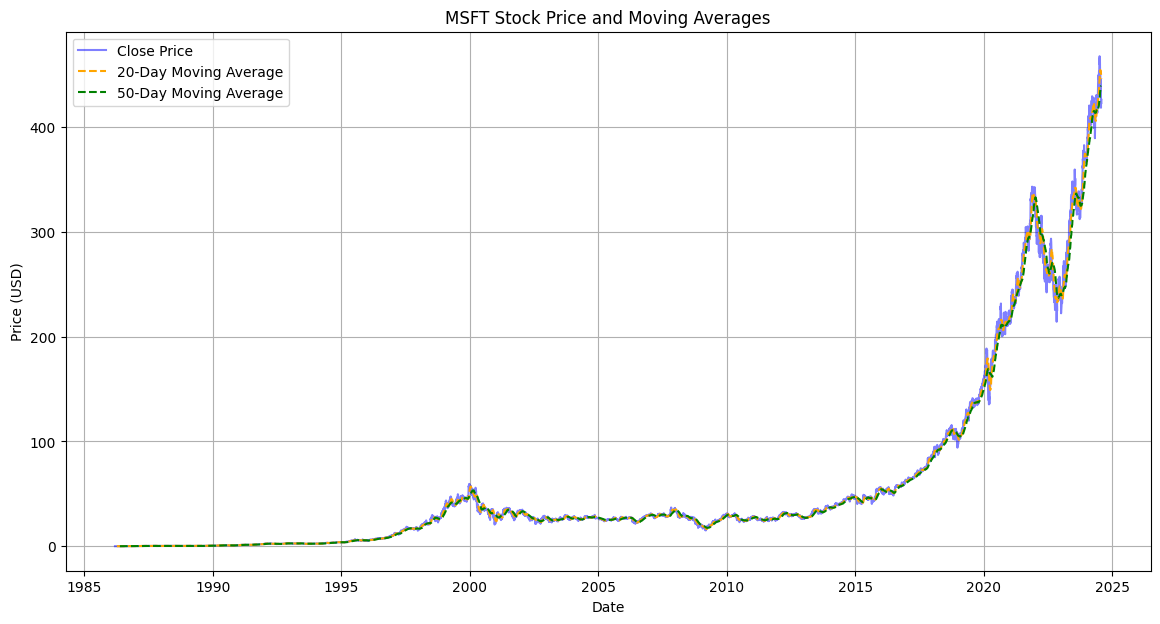

In [6]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['MA20'], label='20-Day Moving Average', color='orange', linestyle='--')
plt.plot(df['MA50'], label='50-Day Moving Average', color='green', linestyle='--')

plt.title('MSFT Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()